In [1]:
import json
import os
import torchvision
import sys
sys.path.insert(0, './lavila')

from lavila_utils import *
from lavila.lavila.utils.preprocess import generate_tokenizer

c:\Users\kevin\anaconda3\envs\ego4d\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kevin\anaconda3\envs\ego4d\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\kevin\anaconda3\envs\ego4d\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\kevin\anaconda3\envs\ego4d\lib\site-packages\torchvision\transforms\_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be remove

In [2]:
file_path = r'C:\Users\kevin\OneDrive\Desktop\Ego4D\ego4d_data\v2\annotations\goalstep_train.json'
with open(file_path, 'r') as file:
    data = json.load(file)
videos = data['videos']

In [3]:
video_index ={}
for i, video in enumerate(videos):
    video_index[video['video_uid']] = i

In [4]:
video_path = r'C:\Users\kevin\OneDrive\Desktop\Ego4D\793a9c9d-327e-4457-9c40-e626b2208aae.mp4'
file_name = os.path.splitext(os.path.basename(video_path))[0]
video_frames, _, _= torchvision.io.read_video(video_path, output_format='TCHW', pts_unit='sec')
video_frames = video_frames.float()

In [5]:
sample_video_id = video_index[file_name]
sample_video = videos[sample_video_id]
# labels, frames = read_frames_between_intervals(videos[sample_video_id], video)
    

In [8]:
# step0_tensors = frames[0]

In [6]:
model_download_dir = r'C:\Users\kevin\OneDrive\Desktop\Ego4D\lavila\downloaded_models'
url = 'https://dl.fbaipublicfiles.com/lavila/checkpoints/dual_encoders/ego4d/clip_openai_timesformer_large_336px_distilbert_base.baseline.ep_0003.pth'


In [7]:
ckpt, state_dict = download_and_load_model_weight(model_download_dir, url)

Model already exists. Skipping download.


c:\Users\kevin\OneDrive\Desktop\Ego4D\lavila_utils.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location='cpu')


In [8]:
num_frames = 4

In [9]:
model = initialize_model_from_ckpt(ckpt, state_dict, num_frames)

=> creating model: CLIP_OPENAI_TIMESFORMER_LARGE_336PX_DISTILBERT_BASE
######USING ATTENTION STYLE:  frozen-in-time
=> Loading CLIP (ViT-L/14@336px) weights
_IncompatibleKeys(missing_keys=['temporal_embed', 'blocks.0.timeattn.qkv.weight', 'blocks.0.timeattn.qkv.bias', 'blocks.0.timeattn.proj.weight', 'blocks.0.timeattn.proj.bias', 'blocks.0.norm3.weight', 'blocks.0.norm3.bias', 'blocks.1.timeattn.qkv.weight', 'blocks.1.timeattn.qkv.bias', 'blocks.1.timeattn.proj.weight', 'blocks.1.timeattn.proj.bias', 'blocks.1.norm3.weight', 'blocks.1.norm3.bias', 'blocks.2.timeattn.qkv.weight', 'blocks.2.timeattn.qkv.bias', 'blocks.2.timeattn.proj.weight', 'blocks.2.timeattn.proj.bias', 'blocks.2.norm3.weight', 'blocks.2.norm3.bias', 'blocks.3.timeattn.qkv.weight', 'blocks.3.timeattn.qkv.bias', 'blocks.3.timeattn.proj.weight', 'blocks.3.timeattn.proj.bias', 'blocks.3.norm3.weight', 'blocks.3.norm3.bias', 'blocks.4.timeattn.qkv.weight', 'blocks.4.timeattn.qkv.bias', 'blocks.4.timeattn.proj.weight', 'b

c:\Users\kevin\anaconda3\envs\ego4d\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


=> initialize initial temperature with 0.07
=> inflating PE in models due to different frame numbers


In [10]:
print(model)

CLIP_HF(
  (visual): SpaceTimeTransformer(
    (patch_embed): VideoPatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
    )
    (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-23): 24 x SpaceTimeBlock(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): VarAttention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (timeattn): VarAttention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )


In [11]:
input = transform_input(ckpt, video_frames)

In [12]:
input.shape

torch.Size([1, 3, 450, 336, 336])

In [13]:
def get_start_end_description(video_dict: dict) -> list[tuple]:
    segments = video_dict['segments']
    labeled_intervals = [(step['start_time'], step['end_time'], step['step_description']) for step in segments]
    return labeled_intervals

In [14]:
start_end_description = get_start_end_description(sample_video)
start_end_description.append([0,0, 'Nothing happens here'])

In [15]:
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)
tokenizer = generate_tokenizer(ckpt['args'].model)


cuda
=> Initialize MyDistilBertTokenizer (distilbert-base-uncased)


In [21]:
# num_input_frames = 4
# video_chunks = []
# video_embeddings = []
# for i in range(0, 450, num_input_frames):
#     frame_chunk = input[:, :, i:i+num_input_frames, :, :].to(device)
#     with torch.no_grad():
#         video_embedding = model.encode_image(frame_chunk)
#         video_embeddings.append(video_embedding)


# video_embeddings = torch.cat(video_embeddings, dim=0).to(device)  # Shape: [450, D] where D is the embedding dimension


# text_embeddings = []
# for _, _, description in start_end_description:
#     texts = tokenizer(description)
#     if isinstance(texts, tuple):
#         texts, masks = texts
#     texts = texts.view(-1, 77).contiguous().to(device)
#     masks = masks.view(-1, 77).contiguous().to(device) if masks is not None else None
    
#     with torch.no_grad():
#         if masks is not None:
#             class_embeddings = model.encode_text(texts, attention_mask=masks)
#         else:
#             class_embeddings = model.encode_text(texts)
#         text_embeddings.append(class_embeddings)


# text_embeddings = torch.cat(text_embeddings, dim=0).to(device)  # Shape: [N, D] where N is the number of descriptions and D is the embedding dimension


# video_embeddings = F.normalize(video_embeddings, p=2, dim=1)  # Normalize along embedding dimension
# text_embeddings = F.normalize(text_embeddings, p=2, dim=1)

# similarities = torch.mm(video_embeddings, text_embeddings.T)  # Shape: [450, N]

# # `similarities[i, j]` gives the cosine similarity between the i-th video frame and the j-th text embedding


In [16]:
num_input_frames = 4
stride = 4
video_embeddings = []
windows = []

for i in range(0, input.size(2) - num_input_frames + 1, stride):
    frame_chunk = input[:, :, i:i + num_input_frames, :, :].to(device)
    windows.append((i, i + num_input_frames))
    assert frame_chunk.size(2) == num_input_frames
    with torch.no_grad():
        video_embedding = model.encode_image(frame_chunk)
        video_embeddings.append(video_embedding)
last_start = input.size(2) - num_input_frames

if last_start >= 0 and last_start % stride != 0:
    frame_chunk = input[:, :, last_start:, :, :].to(device)
    windows.append((last_start, last_start + num_input_frames))
    assert frame_chunk.size(2) == num_input_frames
    with torch.no_grad():
        video_embedding = model.encode_image(frame_chunk)
        video_embeddings.append(video_embedding)



video_embeddings = torch.cat(video_embeddings, dim=0).to(device) 

text_embeddings = []
for _, _, description in start_end_description:
    texts = tokenizer(description)
    if isinstance(texts, tuple):
        texts, masks = texts
    texts = texts.view(-1, 77).contiguous().to(device)
    masks = masks.view(-1, 77).contiguous().to(device) if masks is not None else None
    
    with torch.no_grad():
        if masks is not None:
            class_embeddings = model.encode_text(texts, attention_mask=masks)
        else:
            class_embeddings = model.encode_text(texts)
        text_embeddings.append(class_embeddings)

text_embeddings = torch.cat(text_embeddings, dim=0).to(device)  # Shape: [N_text_descriptions, D]


video_embeddings = F.normalize(video_embeddings, p=2, dim=1)  
text_embeddings = F.normalize(text_embeddings, p=2, dim=1)


similarities = torch.mm(video_embeddings, text_embeddings.T)  

# num_video_chunks = video_embeddings.size(0)  
# frame_to_text_mapping = {}


In [17]:
similarities.shape

torch.Size([113, 4])

In [18]:
similarities_smooth = torch.nn.functional.avg_pool1d(similarities.T.unsqueeze(0), kernel_size=7, stride=1, padding=2).squeeze(0).T


In [19]:

# for idx, (s, e) in enumerate(windows):
#     frame_indices = list(range(s, e))
#     sim_scores = similarities_smooth[idx]  
#     most_similar_text_index = torch.argmax(sim_scores).item()
    
#     for frame_index in frame_indices:
#         if frame_index not in frame_to_text_mapping:
#             frame_to_text_mapping[frame_index] = most_similar_text_index
#         else:
           
#             current_text_index = frame_to_text_mapping[frame_index]
#             if sim_scores[most_similar_text_index] > sim_scores[current_text_index]:
#                 frame_to_text_mapping[frame_index] = most_similar_text_index

# for frame_index in range(450):  
#     if frame_index in frame_to_text_mapping:
#         print(f"Frame {frame_index}: Most similar text label index {frame_to_text_mapping[frame_index]}")
#     else:
#         print(f"Frame {frame_index}: No text assigned")

# labels = []
# for i in frame_to_text_mapping.values():
#     labels.append(i)

In [20]:
labels = torch.argmax(similarities_smooth, dim=1)
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
start_end_description

[(0.01, 4.469, 'Wash the mustard spinach in water'),
 (4.469, 6.735, 'Place the sieve in the bowl'),
 (6.735, 15.018, 'Add the mustard spinach to hot water'),
 [0, 0, 'Nothing happens here']]

In [27]:
# numpy_data = similarities_smooth.cpu().numpy()
# timestamps = np.arange(0, similarities.size(0)) / 30 * num_input_frames
# plt.figure(figsize=(10, 6))
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# for i in range(numpy_data.shape[1]):
#     plt.plot(timestamps, numpy_data[:, i], label=f'Column {i+1}', color=colors[i])
# plt.xlabel('sec')
# plt.ylabel('Value')
# plt.title('Plot of Tensor Columns')
# plt.legend()
# for i in range(1, len(timestamps)):
#     highest_col = np.argmax(numpy_data[i-1, :]) 
#     plt.plot(timestamps[i-1:i+1], [1, 1], color=colors[highest_col], linewidth=5)
# for start, end,_ in start_end_description:
#     plt.axvline(x=start, color='black', linestyle='--', linewidth=2)
#     plt.axvline(x=end, color='black', linestyle='--', linewidth=2)
# plt.show()

In [28]:
def get_segments_with_frame_duration(labels, num_frames_per_segment, time_per_frame, num_total_frames):
    segments = []
    start_idx = 0  
    current_label = labels[0]

    for i in range(1, len(labels)):
        if labels[i] != current_label:
            start_time = start_idx * num_frames_per_segment * time_per_frame
            end_time = i * num_frames_per_segment * time_per_frame
            segments.append((current_label, start_time, end_time))

            start_idx = i
            current_label = labels[i]
    

    start_time = start_idx * num_frames_per_segment * time_per_frame
    end_time = num_total_frames * time_per_frame
    segments.append((current_label, start_time, end_time))

    return segments

num_frames_per_segment = 4
fps = 30  
time_per_frame = 1 / fps  

segments = get_segments_with_frame_duration(labels, num_frames_per_segment, time_per_frame, input.size(2))

for label, start_time, end_time in segments:
    print(f"Label: {label}, Start Time: {start_time:.5f} sec, End Time: {end_time:.5f} sec")


Label: 0, Start Time: 0.00000 sec, End Time: 2.00000 sec
Label: 1, Start Time: 2.00000 sec, End Time: 3.06667 sec
Label: 0, Start Time: 3.06667 sec, End Time: 4.13333 sec
Label: 1, Start Time: 4.13333 sec, End Time: 6.00000 sec
Label: 0, Start Time: 6.00000 sec, End Time: 7.33333 sec
Label: 2, Start Time: 7.33333 sec, End Time: 12.93333 sec
Label: 0, Start Time: 12.93333 sec, End Time: 15.00000 sec


In [29]:
def plot_similarity_over_time(similarities, num_input_frames, start_end_description):

    numpy_data = similarities.cpu().numpy()
    timestamps = np.arange(0, similarities.size(0)) / 30 * num_input_frames
    
    plt.figure(figsize=(10, 6))
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    descriptions = [des for _, _, des in start_end_description]
    for i in range(numpy_data.shape[1]):
        plt.plot(timestamps, numpy_data[:, i], label=descriptions[i], color=colors[i])
    
 
    plt.xlabel('sec')
    plt.ylabel('Value')
    plt.title('Plot of Tensor Columns')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


    for i in range(1, len(timestamps)):
        highest_col = np.argmax(numpy_data[i-1, :]) 
        plt.plot(timestamps[i-1:i+1], [1, 1], color=colors[highest_col], linewidth=5)


    for start, end, _ in start_end_description:
        plt.axvline(x=start, color='black', linestyle='--', linewidth=2)
        plt.axvline(x=end, color='black', linestyle='--', linewidth=2)
    

    plt.show()


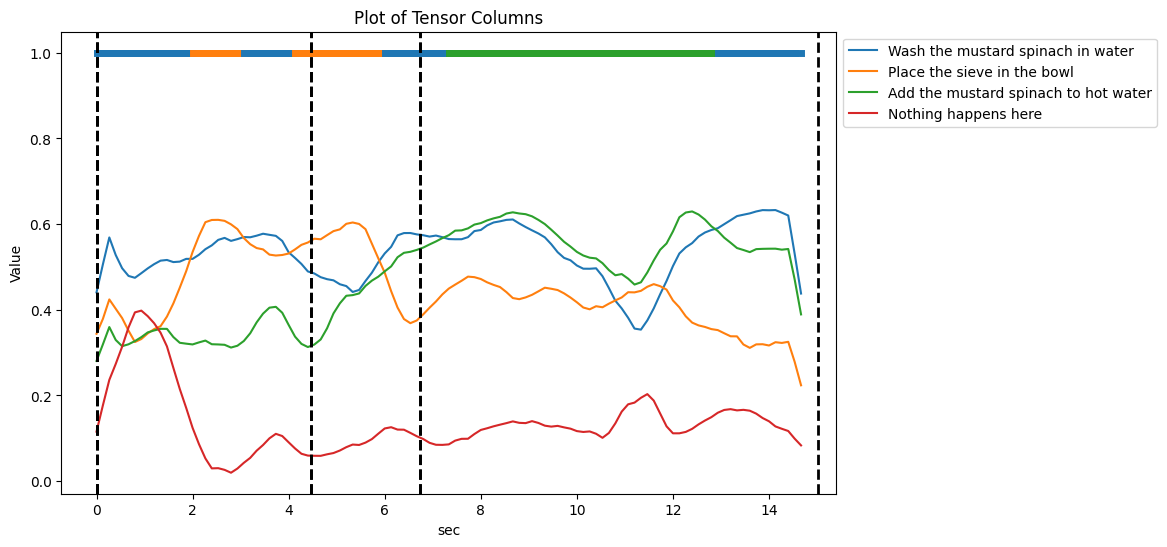

In [30]:
plot_similarity_over_time(similarities_smooth, num_input_frames, start_end_description)

In [31]:

def calculate_iou(pred_window, gt_window):
    pred_start, pred_end = pred_window
    gt_start, gt_end = gt_window


    intersection_start = max(pred_start, gt_start)
    intersection_end = min(pred_end, gt_end)
    intersection = max(0, intersection_end - intersection_start)

    union = (pred_end - pred_start) + (gt_end - gt_start) - intersection

    iou = intersection / union if union > 0 else 0
    return iou

def evaluate_r_at_1(predictions, ground_truths, iou_threshold):
    correct_count = 0
    total_count = len(ground_truths)

    for pred_window, gt_window in zip(predictions, ground_truths):
        iou = calculate_iou(pred_window, gt_window)
        if iou >= iou_threshold:
            correct_count += 1

    return correct_count / total_count


In [32]:
 
ground_truths = []
prediction = []

for idx, start, end in segments:
    prediction.append((start, end))
    truth = start_end_description[idx]
    ground_truths.append((truth[0], truth[1]))


r_at_1_iou_0_3 = evaluate_r_at_1(prediction, ground_truths, iou_threshold=0.3)
print(f"r@1, IoU=0.3: {r_at_1_iou_0_3}")


r_at_1_iou_0_5 = evaluate_r_at_1(prediction, ground_truths, iou_threshold=0.5)
print(f"r@1, IoU=0.5: {r_at_1_iou_0_5}")


r@1, IoU=0.3: 0.42857142857142855
r@1, IoU=0.5: 0.2857142857142857


In [33]:
all_labels = [get_start_end_description(i) for i in videos]

In [106]:
video_durations = {video['video_uid']: video['end_time'] - video['start_time'] for video in videos}
sorted_durations = dict(sorted(video_durations.items(), key=lambda item: item[1]))
sorted_durations

{'2043d7fa-c369-431e-8bd4-3826c6c5d9cc': 14.966666666666669,
 '793a9c9d-327e-4457-9c40-e626b2208aae': 15.0,
 '82c57c2c-45e8-4a1e-b4b6-46b5c3fc1bf3': 20.9,
 '28e0affc-cacb-4db8-ab32-dfc16931b86a': 31.666666666666668,
 '487ca35f-25c6-4e5d-9ba9-d079bc4c162a': 31.8,
 'b69e598c-a6e5-4830-bb8d-15b77e0a6154': 35.666666666666664,
 '30f78038-4b88-4dd3-be80-4f2fe791f3e1': 39.1,
 '02953bf3-4b5b-45ea-8339-465ed47a9337': 40.4,
 'c2aecde5-ea0c-4343-83c1-355b050e6ffe': 44.599999999999994,
 '487d752c-6e22-43e3-9c08-627bc2a6c6d4': 56.599999999999994,
 '15440074-6cd7-479c-b308-4d68bf813cc1': 57.0,
 '573fc64b-6613-449a-aa28-69810a346e14': 65.46666666666665,
 '06bb2e99-5112-4987-ac5b-9fd52bb144d0': 102.86666666666666,
 '2bc7d6fa-a02e-4367-b316-d6b4e8a2ce3f': 104.33333333333331,
 '7e8d03f2-2ff9-431d-af81-e5ffcd954a63': 106.8,
 '73a525a3-f393-47e3-b3f7-1ecc5b5f0437': 112.43333333333334,
 'fb5ea36d-8164-40cd-b786-dd1e70b985d4': 113.43333333333332,
 '9732292c-19dd-4457-8b29-c6e18cc82977': 113.43333333333332,


In [33]:

def sliding_window_print_indices(arr, window_size, stride):
    if window_size > len(arr):
        return
    
    for i in range(0, len(arr) - window_size + 1, stride):
        print(f'Window {arr[i:i + window_size]}')
    
    last_start = len(arr) - window_size
    if last_start >= 0 and last_start % stride != 0:
        print(f'Last window {arr[last_start:]}')
arr = list(range(10))
window_size = 4
stride = 4
sliding_window_print_indices(arr, window_size, stride)

Window [0, 1, 2, 3]
Window [4, 5, 6, 7]
Last window [6, 7, 8, 9]
